In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
df=pd.read_excel(r"D:\Python-SQL-Repository\Dataset\Heart_Attack_logistic_regression.ipynb")
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [3]:
df.shape

(4312, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [5]:
df.duplicated().sum()

np.int64(68)

In [6]:
df['RiskOfCHD'].value_counts()

RiskOfCHD
0    3654
1     658
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(68)

In [9]:
df1=df.dropna()

In [10]:
df1.isnull().sum()

Sex                    0
Age                    0
Heart Rate             0
Glucose                0
BMI                    0
Smoker                 0
Ciggarates(Per Day)    0
Hypertension           0
Systolic  BP           0
Diastolic BP           0
ON BP Medication       0
Previous Stroke        0
Diabetic               0
RiskOfCHD              0
dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')
df1.drop_duplicates(inplace=True)

In [12]:
df1.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

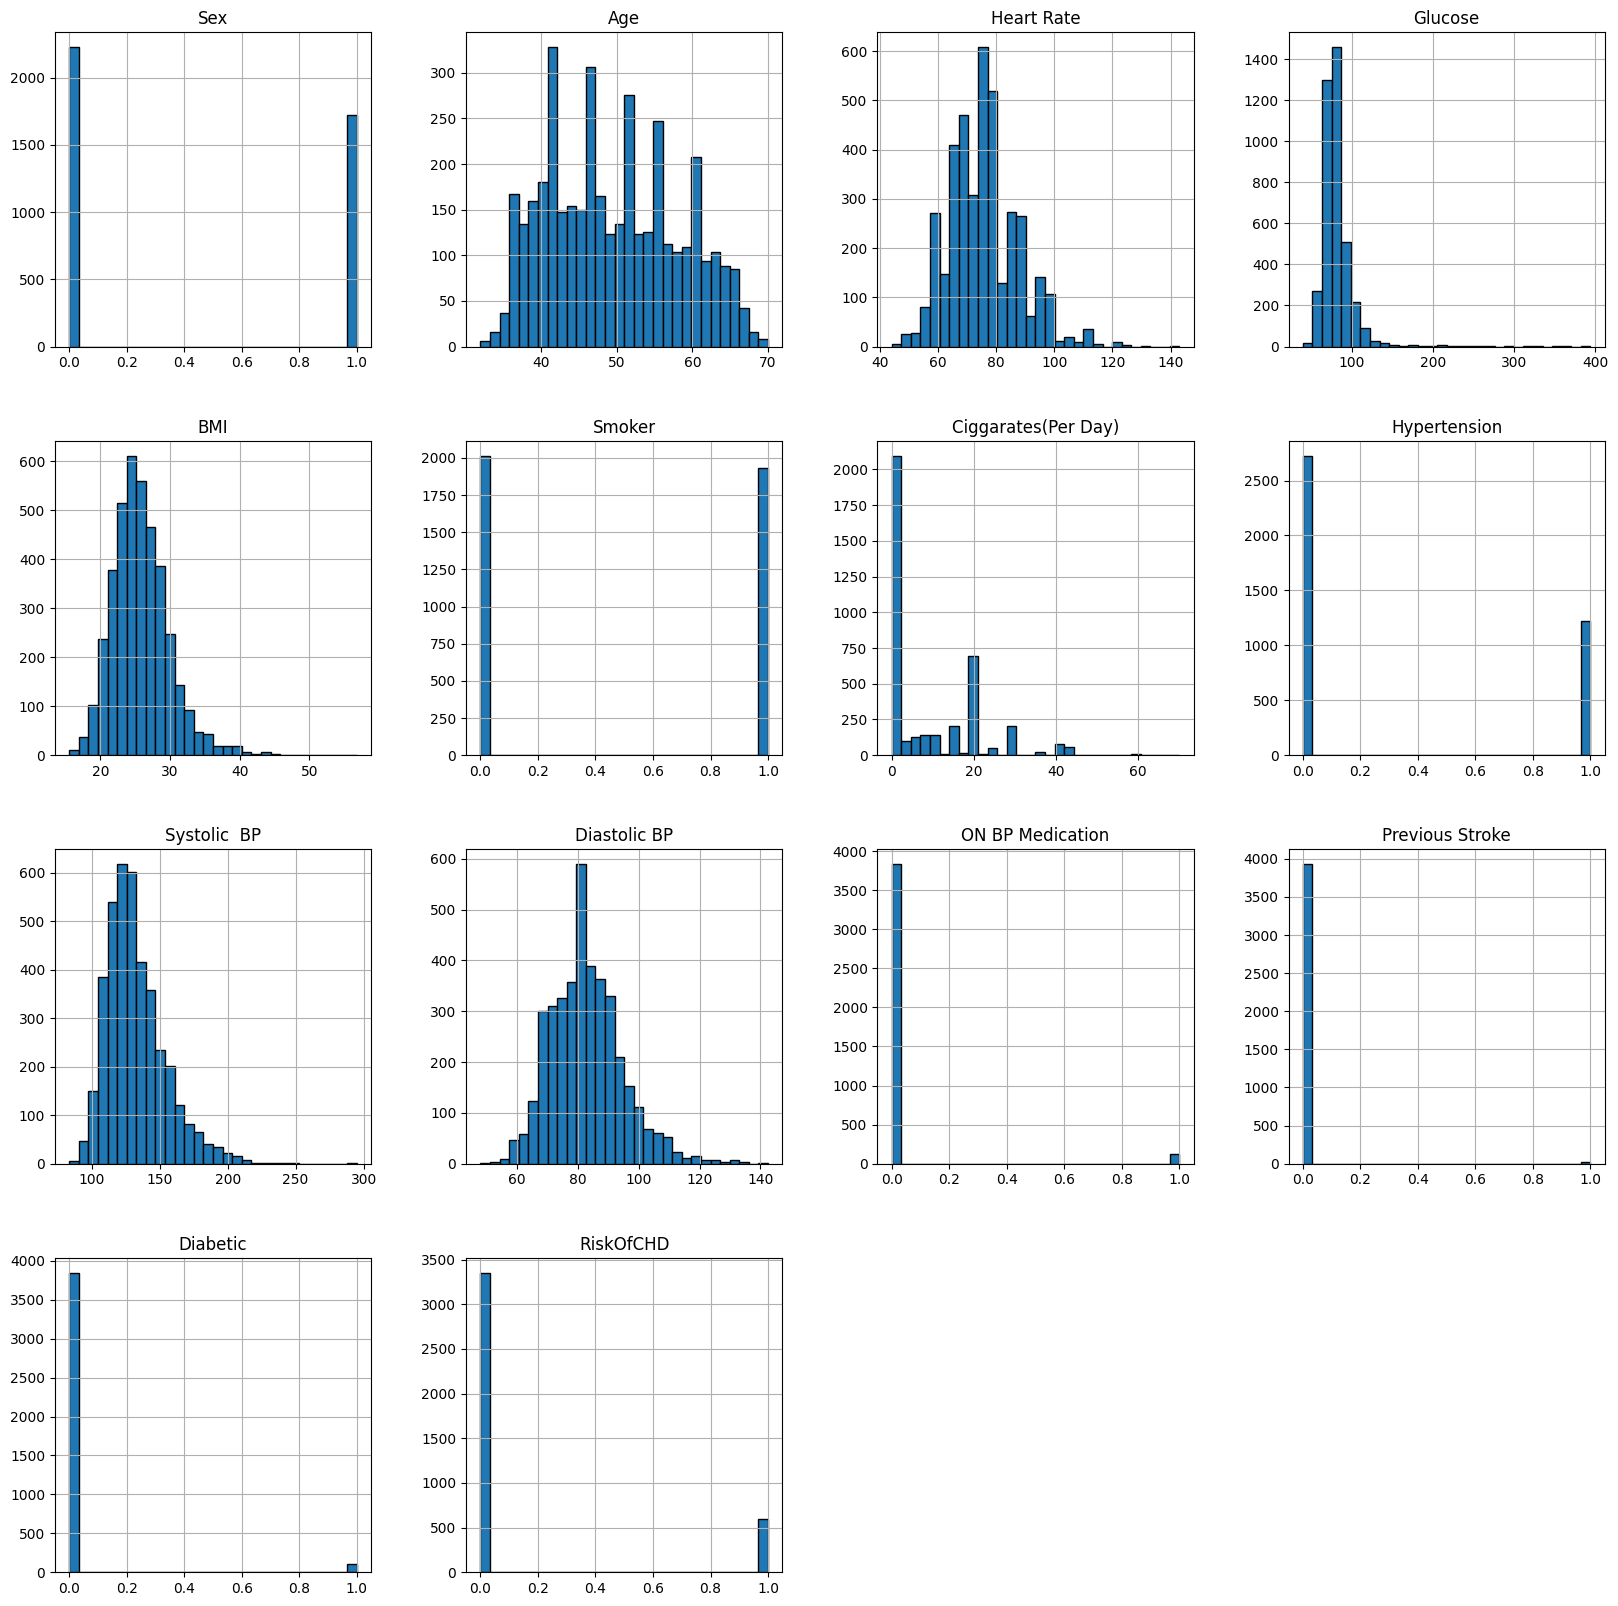

In [14]:
df1.hist(figsize=(20,20),bins=30, edgecolor='black')
plt.show()

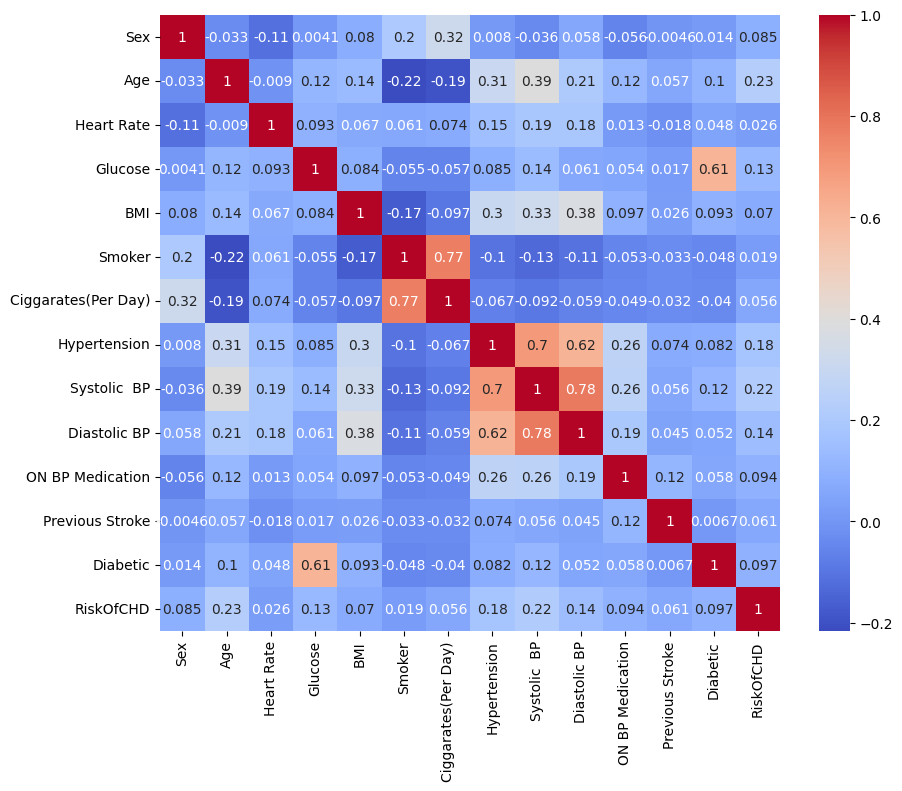

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
x=df1[['Age']]
y=df1['RiskOfCHD']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced')

In [27]:
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [28]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
y_test.value_counts()

RiskOfCHD
0    677
1    113
Name: count, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score,classification_report
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Classification:{classification_report(y_test,y_pred)}')

Accuracy:0.6291139240506329
Classification:              precision    recall  f1-score   support

           0       0.91      0.63      0.74       677
           1       0.22      0.61      0.32       113

    accuracy                           0.63       790
   macro avg       0.56      0.62      0.53       790
weighted avg       0.81      0.63      0.68       790



In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [31]:
x_val=np.linspace(x.min(),x.max(),300).reshape(-1,1)
z_val=model.intercept_ + model.coef_[0][0]*x_val
p_val=sigmoid(z_val)

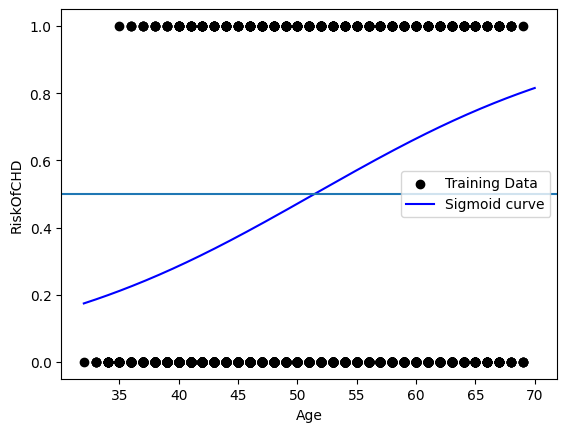

In [32]:
# Replace 'feature_name' with the actual column you want to plot
feature_name = 'Age'  # Example: use your actual feature
plt.scatter(x_train[feature_name], y_train, label='Training Data', color='k')
plt.plot(x_val, p_val, label='Sigmoid curve', color='b')
plt.axhline(y=0.5)
plt.xlabel(feature_name)
plt.ylabel('RiskOfCHD')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Set up stratified k-fold cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid,
    cv=stratified_cv,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Predict with the best estimator
y_pred = grid_search.predict(x_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Best parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.6321641356897831
Test accuracy: 0.6291139240506329
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.74       677
           1       0.22      0.61      0.32       113

    accuracy                           0.63       790
   macro avg       0.56      0.62      0.53       790
weighted avg       0.81      0.63      0.68       790

